Nama              : Dwi Abriansya Alimuddin

No Registrasi FGA : 0182180121-127

# Import Module yang dibutuhkan

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import zipfile,os

## Install dan import module `splitfolder`
Module splitfolder dapat memudahkan split data train dan test yang berbentuk images

In [2]:
# install module splitfolder
!pip install split-folders tqdm

In [3]:
import splitfolders

# Menyiapkan Data

In [4]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-06 10:25:09--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss  47%[========>           ] 147.47M  6.17MB/s    in 22s     

2021-07-06 10:25:32 (6.74 MB/s) - Read error at byte 154632192/322873683 (Connection reset by peer). Retrying.

--2021-07-06 10:25:33--  (try: 2)  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 

## Ekstraksi data dari file zip
File zip yang telah diakses di atas akan diekstrak agar data yang terdapat di dalamnya dapat diakses

In [5]:
# Melakukan ekstraksi pada file zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Inisiasi direktori base dan direktori data
base_dir = '/tmp/rockpaperscissors'
data_dir = os.path.join(base_dir, 'rps-cv-images')

In [6]:
# Melihat isi dari direktori data
os.listdir(data_dir)

['rock', 'README_rpc-cv-images.txt', 'scissors', 'paper']

## Train Test Split
Data yang terdapat dalam direktori data akan displit menjadi data train dan data validation dengan rasio 60:40. Hasil split akan tersimpan dalam direktori baru.

In [7]:
# Split data menjadi data train dan data validation dengan ratio 60:40
splitfolders.ratio(data_dir, output=data_dir+'/data', ratio=(.6, .4))

Copying files: 2188 files [00:00, 3766.47 files/s]


In [8]:
# Melihat isi dari direktori baru hasil split
os.listdir(data_dir+'/data')

['val', 'train']

In [9]:
# Melihat jumlah data train dan data validation
print('Jumlah data train: ', len(os.listdir(data_dir+'/data/train/rock')+os.listdir(data_dir+'/data/train/paper')+os.listdir(data_dir+'/data/train/scissors')))
print('Jumlah data validation: ', len(os.listdir(data_dir+'/data/val/rock')+os.listdir(data_dir+'/data/val/paper')+os.listdir(data_dir+'/data/val/scissors')))

Jumlah data train:  1312
Jumlah data validation:  876


In [10]:
# Inisiasi direktori data train dan data validation
train_dir = os.path.join(data_dir, 'data/train')
val_dir = os.path.join(data_dir, 'data/val')

# Image Data Generator

In [11]:
# Augmentasi gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [61]:
# Mempersiapkan data train dan data validation
train_generator = train_datagen.flow_from_directory(
        train_dir,                        # Direktori data train
        target_size=(200, 300),           # Resolusi data (200x300 pixel)
        batch_size=10,
        class_mode='categorical')         # Klasifikasi 3 class, sehingga menggunakan 'categorical'

validation_generator = test_datagen.flow_from_directory(
        val_dir,                          # Direktori data validasi
        target_size=(200, 300),           # Resolusi data (200x300 pixel)
        batch_size=10,
        class_mode='categorical')         # Klasifikasi 3 class, sehingga menggunakan 'categorical'

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


# Convolution Neural Network

## Arsitektur CNN 

In [62]:
model = tf.keras.models.Sequential([
    # Convolution layer pertama
    # Resolusi data (300x200 pixel) dengan warna RGB, shingga input_shape = (200, 300, 3)
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Convolution layer kedua
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Convolution layer ketiga
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Convolution layer keempat
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Convolution layer kelima
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Convolution layer keenam
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Meratakan input
    tf.keras.layers.Flatten(),
    # Hidden layer dengan 512 neuron
    tf.keras.layers.Dense(512, activation='relu'),
    # Output layer, klasifikasi 3 class sehingga menggunakan aktivasi softmax
    tf.keras.layers.Dense(3, activation='softmax')
])

## Compile model

In [63]:
# Compile model dengan parameter loss, optimizer, dan metrics
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

# Train Model

In [64]:
# Train model yang telah dibuat dengan menggunakan data yang telah disiapkan dan epoch sebanyak 25.
history = model.fit(
      train_generator,                        # Data train yang telah disiapkan
      steps_per_epoch=20,                     # Jumlah step per epoch
      epochs=25,                              # Jumlah epoch
      validation_data=validation_generator,   # Data validation yang telah disiapkan
      validation_steps=5,                     
      verbose=2)                              # Menampilkan hasil tiap epoch

Epoch 1/25
20/20 - 5s - loss: 1.1137 - accuracy: 0.3600 - val_loss: 1.1096 - val_accuracy: 0.2800
Epoch 2/25
20/20 - 3s - loss: 1.1061 - accuracy: 0.3350 - val_loss: 1.0955 - val_accuracy: 0.3400
Epoch 3/25
20/20 - 4s - loss: 1.1066 - accuracy: 0.3229 - val_loss: 1.1100 - val_accuracy: 0.2800
Epoch 4/25
20/20 - 3s - loss: 1.1107 - accuracy: 0.3281 - val_loss: 1.0841 - val_accuracy: 0.7000
Epoch 5/25
20/20 - 3s - loss: 1.1246 - accuracy: 0.5208 - val_loss: 0.8153 - val_accuracy: 0.6800
Epoch 6/25
20/20 - 3s - loss: 0.8271 - accuracy: 0.6600 - val_loss: 0.6316 - val_accuracy: 0.7000
Epoch 7/25
20/20 - 4s - loss: 0.6620 - accuracy: 0.7350 - val_loss: 0.7155 - val_accuracy: 0.7200
Epoch 8/25
20/20 - 3s - loss: 0.3969 - accuracy: 0.8500 - val_loss: 0.5561 - val_accuracy: 0.7600
Epoch 9/25
20/20 - 4s - loss: 0.3907 - accuracy: 0.8750 - val_loss: 0.6318 - val_accuracy: 0.7600
Epoch 10/25
20/20 - 3s - loss: 0.3702 - accuracy: 0.8646 - val_loss: 0.4299 - val_accuracy: 0.8600
Epoch 11/25
20/20 -

# Test Model

Saving WhatsApp Image 2021-07-06 at 17.42.59 (1).jpeg to WhatsApp Image 2021-07-06 at 17.42.59 (1) (2).jpeg
WhatsApp Image 2021-07-06 at 17.42.59 (1).jpeg
paper


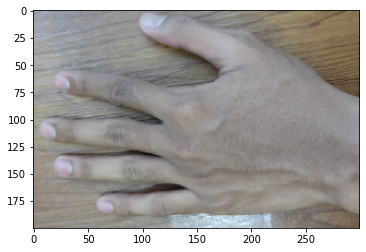

In [74]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200, 300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0] == 1:
    print('paper')
  elif classes[0][1] == 1:
     print('rock')
  else:
    print('scissors')